In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



%matplotlib inline

# =================== Cancer  Data Set  ============

In [2]:
# Cargamos los datos del fichero CSV
cancer_df = pd.read_csv('../../data/06_breast-cancer-wisconsin-data.csv')

# Imprimimos los datos cargados con pandas
#df.describe()
#df = df.set_index('id')
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## Preparamos Datos

In [3]:
le = preprocessing.LabelEncoder()
le.fit(cancer_df['diagnosis'])
cancer_df['diagnosis_cod'] = le.transform(cancer_df['diagnosis'])
cancer_df = cancer_df.drop(['Unnamed: 32','id','diagnosis'], axis=1)
cancer_df
#le.inverse_transform(iris_df.species_cod)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_cod
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,1
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,1
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,1
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,1
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,1
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,1
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,1
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,1
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,1
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,1


In [4]:
# separamos datos en data y target
cancer_data = cancer_df.drop(['diagnosis_cod'], axis=1)
cancer_target = cancer_df.diagnosis_cod

In [5]:
# Separamos los Datos.... Entrenamiento y test
#?  train_test_split()


X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_target,
                                                    test_size=0.33,
                                                    random_state=None,
                                                    shuffle =None)

print('Set de datos para Entrenamiento =',len(X_train))
print('Set de datos para Test',len(X_test))
print('Total',len(X_test)+len(X_train))
print('Data Shape=',X_test.shape)
print('Target Shape =',y_test.shape)

X_train.head()
#X_train.columns

Set de datos para Entrenamiento = 381
Set de datos para Test 188
Total 569
Data Shape= (188, 30)
Target Shape = (188,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
487,19.440,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,0.1823,0.06115,...,23.96,30.39,153.90,1740.0,0.15140,0.3725,0.5936,0.20600,0.3266,0.09009
475,12.830,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,0.1705,0.05913,...,14.09,19.35,93.22,605.8,0.13260,0.2610,0.3476,0.09783,0.3006,0.07802
476,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.3429,0.2512,0.13390,0.2534,0.07858
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.14600,0.1310,0.0000,0.00000,0.2445,0.08865


# ======== Knn Cancer Data Set =========

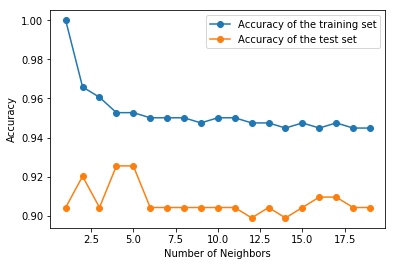

In [6]:
# Create two lists for training and test accuracies
training_accuracy = []
test_accuracy = []

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,20)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,
                               algorithm='auto',
                               weights='uniform')
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=6, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set', marker='o')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set', marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()


In [8]:
clf = KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='auto')
clf.fit(X_train, y_train)
print ("Score with data Tes",clf.score(X_test,y_test))
print ("Score with data Train",clf.score(X_train,y_train))

Score with data Tes 0.925531914893617
Score with data Train 0.952755905511811


#  Alguna Predicción 

In [10]:
warnings.filterwarnings('ignore')
ind = 78
print(cancer_data.iloc[ind])
print('specie',cancer_target.iloc[ind], le.inverse_transform(cancer_target.iloc[ind]))
x_new = cancer_data.iloc[ind]

print('\n======== PREDICTION ========')
prediction = clf.predict([x_new.values])
prediction_pb = clf.predict_proba([x_new.values])
print('Specie prediction',prediction, le.inverse_transform(prediction))
print('Probability Specie prediction',prediction_pb)

radius_mean                  20.180000
texture_mean                 23.970000
perimeter_mean              143.700000
area_mean                  1245.000000
smoothness_mean               0.128600
compactness_mean              0.345400
concavity_mean                0.375400
concave points_mean           0.160400
symmetry_mean                 0.290600
fractal_dimension_mean        0.081420
radius_se                     0.931700
texture_se                    1.885000
perimeter_se                  8.649000
area_se                     116.400000
smoothness_se                 0.010380
compactness_se                0.068350
concavity_se                  0.109100
concave points_se             0.025930
symmetry_se                   0.078950
fractal_dimension_se          0.005987
radius_worst                 23.370000
texture_worst                31.720000
perimeter_worst             170.300000
area_worst                 1623.000000
smoothness_worst              0.163900
compactness_worst        

# Clasification Report

In [11]:
p = clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, p))
print ('\nConfusion Matrix:\n', confusion_matrix(y_test, p))
print ('\nClassification Report:', classification_report(y_test, p))


Accuracy: 0.925531914893617

Confusion Matrix:
 [[105   7]
 [  7  69]]

Classification Report:              precision    recall  f1-score   support

          0       0.94      0.94      0.94       112
          1       0.91      0.91      0.91        76

avg / total       0.93      0.93      0.93       188



#   Diabetes Data Set 

In [12]:
# Cargamos los datos del fichero CSV
diabetes_df = pd.read_csv('../../data/06_diabetes.csv')

# Imprimimos los datos cargados con pandas
#diabetes_df.info()
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
# separamos datos en data y target
diabetes_data   = diabetes_df.drop(['diagnosis'], axis=1)
diabetes_target = diabetes_df.diagnosis

In [14]:
# Separamos los Datos.... Entrenamiento y test
#?  train_test_split()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes_target,
                                                    test_size=0.33,
                                                    random_state=None,
                                                    shuffle =None)

print('Set de datos para Entrenamiento =',len(X_train))
print('Set de datos para Test',len(X_test))
print('Total',len(X_test)+len(X_train))
print('Data Shape=',X_test.shape)
print('Target Shape =',y_test.shape)

X_train.head()
#X_train.columns

Set de datos para Entrenamiento = 514
Set de datos para Test 254
Total 768
Data Shape= (254, 8)
Target Shape = (254,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
255,1,113,64,35,0,33.6,0.543,21
698,4,127,88,11,155,34.5,0.598,28
114,7,160,54,32,175,30.5,0.588,39
155,7,152,88,44,0,50.0,0.337,36
275,2,100,70,52,57,40.5,0.677,25


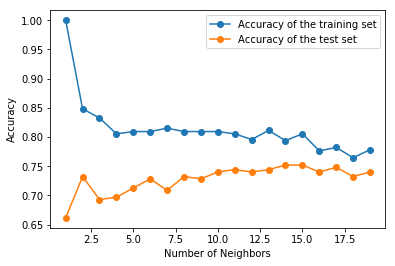

In [15]:
# Create two lists for training and test accuracies
training_accuracy = []
test_accuracy = []

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,20)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,
                               algorithm='auto',
                               weights='uniform')
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=6, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set', marker='o')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set', marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [16]:
clf = KNeighborsClassifier(n_neighbors=15,weights='uniform', algorithm='auto')
clf.fit(X_train, y_train)
print ("Score with data Tes",clf.score(X_test,y_test))
print ("Score with data Train",clf.score(X_train,y_train))

Score with data Tes 0.7519685039370079
Score with data Train 0.8054474708171206


# ========= Alguna Predicción ========

In [17]:
ind = 78
print(diabetes_data.iloc[ind])
print('specie',diabetes_target.iloc[ind], le.inverse_transform(diabetes_target.iloc[ind]))
x_new = diabetes_data.ix[ind]

print('\n======== PREDICTION ========')
prediction = clf.predict([x_new.values])
prediction_pb = clf.predict_proba([x_new.values])
print('Specie prediction',prediction, le.inverse_transform(prediction))
print('Probability Specie prediction',prediction_pb)

Pregnancies                   0.00
Glucose                     131.00
BloodPressure                 0.00
SkinThickness                 0.00
Insulin                       0.00
BMI                          43.20
DiabetesPedigreeFunction      0.27
Age                          26.00
Name: 78, dtype: float64
specie 1 M

======== PREDICTION ========
Specie prediction [1] ['M']
Probability Specie prediction [[0.33333333 0.66666667]]


# ============ Classification Report============

In [16]:
p = clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, p))
print ('\nConfusion Matrix:\n', confusion_matrix(y_test, p))
print ('\nClassification Report:', classification_report(y_test, p))


Accuracy: 0.696850393701

Confusion Matrix:
 [[136  26]
 [ 51  41]]

Classification Report:              precision    recall  f1-score   support

          0       0.73      0.84      0.78       162
          1       0.61      0.45      0.52        92

avg / total       0.69      0.70      0.68       254

